타이타닉 생존 예측 - Tree

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz 
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [4]:
df = pd.read_csv('titanic.csv')
df.shape

(887, 8)

In [7]:
df.Name.nunique()

887

In [8]:
df = df.set_index('Name')

In [11]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

In [12]:
df.columns = ['Survived', 'Pclass', 'Sex', 'Age', 'Siblings', 'Parents', 'Fare']

In [15]:
df.Survived.mean() # 38% 생존

0.3855693348365276

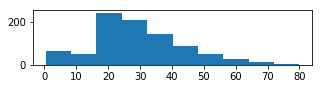

In [30]:
plt.figure(figsize=(5,1))
p = plt.hist(df['Age'].values)

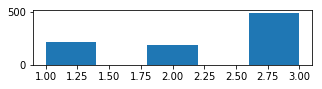

In [33]:
plt.figure(figsize=(5,1))
p = plt.hist(df['Pclass'].values, bins=5)

In [38]:
df['Sex'].value_counts()

male      573
female    314
Name: Sex, dtype: int64

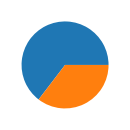

In [40]:
plt.figure(figsize=(5,2))
p = plt.pie(df['Sex'].value_counts())

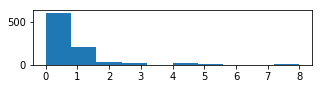

In [43]:
plt.figure(figsize=(5,1))
p = plt.hist(df['Siblings'].values)

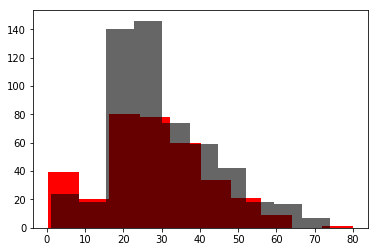

In [53]:
p = plt.hist(df[df['Survived']==1]['Age'].values, color='red')
p = plt.hist(df[df['Survived']==0]['Age'].values, color='black', alpha=0.6)

In [54]:
df.head(1)

,Survived,Pclass,Sex,Age,Siblings,Parents,Fare
Name,,,,,,,
Mr. Owen Harris Braund,0,3,male,22.0,1,0,7.25


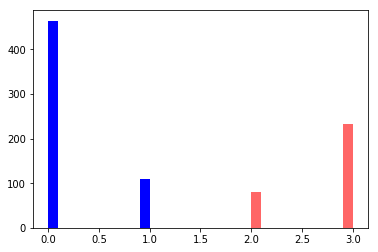

In [61]:
p = plt.hist(df[df['Sex']=='male']['Survived'].values, color='blue')
p = plt.hist(df[df['Sex']=='female']['Survived'].values+2, color='red', alpha=0.6)

In [68]:
# 1,2,3 등석은 범주형입니다
df['Pclass'] = df['Pclass'].astype('object')

In [69]:
data = pd.get_dummies(df)

In [75]:
X = data.drop(columns='Survived')
y = data['Survived']

In [87]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4).fit(X, y)
model.score(X, y)

0.8489289740698985

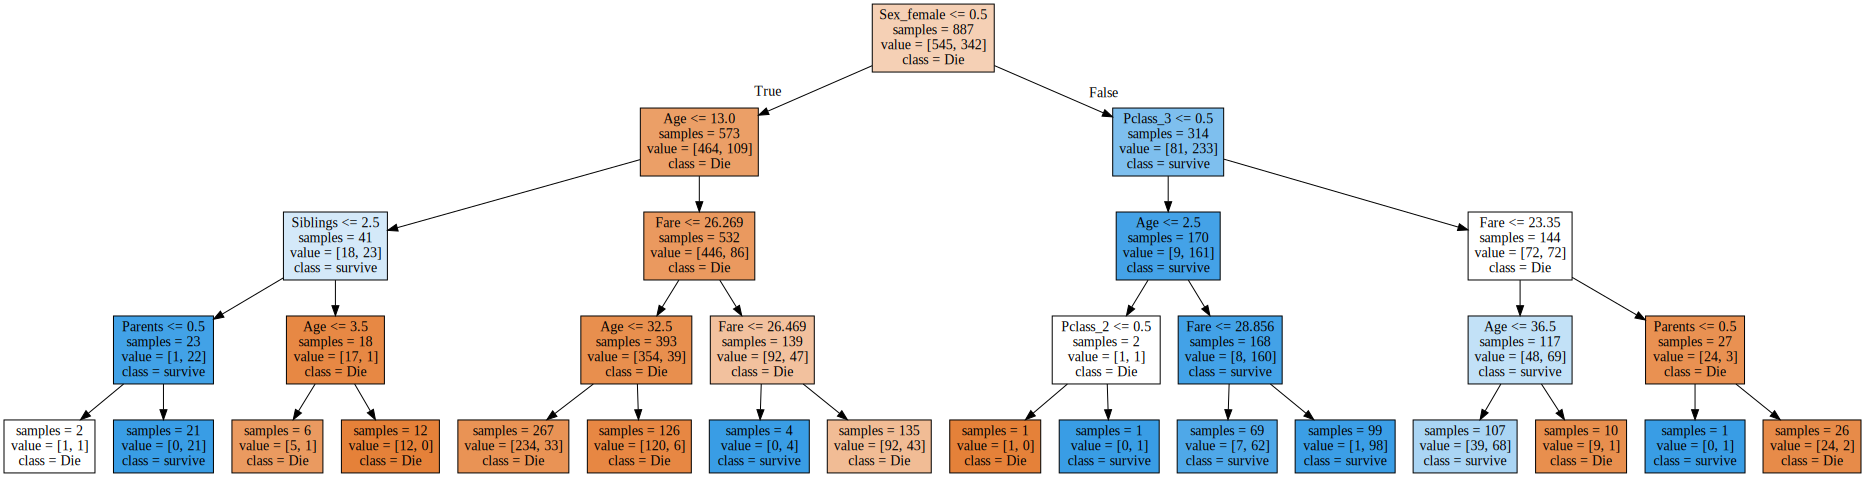

In [85]:
export_graphviz(model, out_file='titanic.dot', class_names=['Die','survive'],
               feature_names=X.columns, impurity=False, filled=True)
with open('titanic.dot') as f:
    dot_graph = f.read()    
g = graphviz.Source(dot_graph)
display(g)